In [14]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
from utils.nolearn_net import NeuralNet
from utils.data_utils import *
from utils.iterator import BaseBatchIterator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
os.getcwd()

'/Users/thorey/Documents/project/competition/fognet'

In [16]:
from model_defs import lstm

# Load data 

In [17]:
data = load_raw_data()

# Preprocessing 

The training set consist of measurements every 2 hours on the station.
While the lag between most of measurements is 2h, some of them show a larger time difference.
We first use that to define some group in the training set.

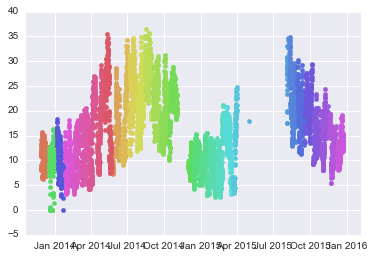

In [62]:
df_train =  add_group_column_to_data(data['micro_train'])
i= 0
for key,gp in df_train.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(df_train.groupby('group')))[i])
    i+=1

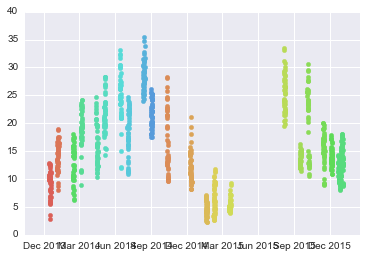

In [63]:
df_test =  add_group_column_to_data(data['micro_test'])
i= 0
for key,gp in df_test.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(df_train.groupby('group')))[i])
    i+=1

## Train/Val/Test split

We are going to split that thing in three different group train/val/test

- I take the 20 first group for training
- I take the 7 that follows for validation
- I take the 8 remaining for testing

In [20]:
train,val,test = train_val_test_split(data['micro_train'],data['labels'])

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


## Processing to feed the data to a RNN 

In [13]:
from sklearn.preprocessing import Imputer
inputer = Imputer(strategy='mean')
inputer.fit(train[train.columns[:-2]])
def df_transform(inputer,df):
    df_tmp = pd.DataFrame(inputer.transform(df[df.columns[:-2]]),
                          columns = df.columns[:-2],
                          index = df.index)
    return df_tmp.join(df[df.columns[-2:]])

In [86]:
train, val, test = train_val_test_split(data['micro_train'], data['labels'])

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


In [87]:
pred = prediction_split(data['micro_train'],
                        data['micro_test'])

In [91]:
set(pred.columns) == set(train.columns)

True

In [97]:
from utils.data_utils import *

In [103]:
train.columns[:-3]

Index([u'percip_mm', u'humidity', u'temp', u'leafwet450_min',
       u'leafwet460_min', u'leafwet_lwscnt', u'gusts_ms', u'wind_dir',
       u'wind_ms'],
      dtype='object')

In [120]:
n, a,b,c = load_data(name = 'micro', feats = train.columns[:-3])

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


In [124]:
for X,_ in c:
    print(X.shape)

85
(85, 12, 9)
85
(85, 12, 9)
163
(163, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)
85
(85, 12, 9)


In [84]:
assert any(pred.columns.isin(train.columns))

In [74]:
from utils.data_utils import prediction_split

In [121]:
i= 0
for key,gp in c:
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(df_train.groupby('group')))[i])
    i+=1

85


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [68]:
assert (1==2), 'Error'

AssertionError: Error

In [65]:
from utils.iterator import *

In [16]:
batch_iterator = BaseBatchIterator(feats=train.columns.tolist()[:-2],
                                   label='yield',
                                   batch_size=5,
                                   size_seq=12,
                                   stride=1)
batch_iterator_train = batch_iterator(train)

In [22]:
X, y, mask = batch_iterator_train.stack_seqs.values()[0]
y2 = np.zeros(mask[1])
mask = mask[0].astype('int')
for k in range(y2.shape[0]):
    y2[k,mask[k,:]] = y[k]

In [23]:
y2

array([[ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

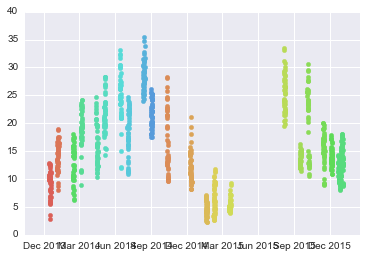

In [43]:
i= 0
for key,gp in gptest:
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(df_train.groupby('group')))[i])
    i+=1

In [51]:
df_train[:gp.index[0]].iloc[-12:]

,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,group
2014-08-30 00:00:00,0,0.326415,27.233333,0,0,438.000000,0.691534,21.375000,0.414920,group15
2014-08-30 02:00:00,0,0.340787,27.308333,0,0,438.000000,0.385583,85.916667,0.226320,group15
2014-08-30 04:00:00,0,0.401388,25.275000,0,0,438.750000,0.456832,142.166667,0.276614,group15
2014-08-30 06:00:00,0,0.368779,26.291667,0,0,437.291667,0.377200,143.541667,0.247276,group15
2014-08-30 08:00:00,0,0.360678,27.841666,0,0,435.000000,0.834032,244.833333,0.515507,group15
2014-08-30 10:00:00,0,0.373053,29.208333,0,0,435.375000,0.963956,155.583333,0.637049,group15
2014-08-30 12:00:00,0,0.454057,28.775000,0,0,437.375000,1.160939,52.208333,0.712490,group15
2014-08-30 14:00:00,0,0.456233,27.262500,0,0,438.041667,1.735122,293.083333,1.336966,group15
2014-08-30 16:00:00,0,0.537580,23.600000,0,0,437.500000,2.384744,315.166667,2.045264,group15
2014-08-30 18:00:00,0,0.698001,19.054167,0,0,440.166667,3.755239,176.250000,3.269070,group15


In [46]:
gp.index[0]

Timestamp('2014-08-31 00:00:00')

In [ ]:
len(df_train)

In [75]:
df_total = df_train.append(df_test)
len(df.sort_index())

72

In [76]:
test = data['submission_format'].join(df_total, how='left')

In [81]:
any(test.index == data['submission_format'].index)

True

In [37]:
df = df_train
timedelta = [df.index[i + 1] - df.index[i] for i in range(len(df) - 1)]

In [58]:
    cut_day_mask = (np.array(map(lambda x: x.components.days, timedelta)) != 0)
    cut_hour_mask = (
        np.array(map(lambda x: x.components.hours, timedelta)) != 2)
    cut = list(np.where((cut_day_mask)|(cut_hour_mask))[0])

In [61]:
add_group_column_to_data(df_train)

,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,group,set
2013-11-23 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group0,train
2013-11-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group0,train
2013-11-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group0,train
2013-11-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,group0,train
2013-11-28 00:00:00,0.000000,0.419516,8.183334,0,0,440.000000,3.382230,125.250000,3.030176,group1,train
2013-11-28 02:00:00,0.000000,0.422065,8.120834,0,0,440.000000,3.482816,124.500000,3.155909,group1,train
2013-11-28 04:00:00,0.000000,0.369994,8.562500,0,0,439.291667,3.403185,124.333333,3.084661,group1,train
2013-11-28 06:00:00,0.000000,0.382980,8.391667,0,0,439.000000,3.336127,126.916667,3.055323,group1,train
2013-11-28 08:00:00,0.000000,0.377310,9.158333,0,0,439.000000,3.927075,120.916667,3.629505,group1,train
2013-11-28 10:00:00,0.000000,0.347650,10.979167,0,0,438.791667,3.910310,121.583333,3.533110,group1,train


In [60]:
False|True

True

In [59]:
cut

[3,
 195,
 387,
 579,
 771,
 963,
 1155,
 1347,
 1539,
 1731,
 1750,
 1875,
 2067,
 2259,
 2451,
 2643,
 2835,
 3027,
 3261,
 3357,
 3549,
 3741,
 3933,
 4125,
 4317,
 4425,
 4440,
 4469,
 4661,
 4853,
 5045,
 5237,
 5429,
 5621]

In [48]:
(np.array(map(lambda x: x.components.days, timedelta)) != 0) & (np.array(map(lambda x: x.components.hours, timedelta)) != 1)

array([False, False, False, ..., False, False, False], dtype=bool)

In [39]:
cut = list(np.where(np.array(map(lambda x: x.components.days, timedelta)) != 0)[0])

In [45]:
np.where(np.array(map(lambda x: x.components.days, timedelta)) != 0)

(array([   3,  195,  387,  579,  771,  963, 1155, 1347, 1539, 1731, 1750,
        1875, 2067, 2259, 2451, 2643, 2835, 3027, 3261, 3357, 3549, 3741,
        3933, 4125, 4317, 4425, 4440, 4469, 4661, 4853, 5045, 5237, 5429,
        5621]),)

In [42]:
set(timedelta)

{Timedelta('0 days 02:00:00'),
 Timedelta('4 days 02:00:00'),
 Timedelta('28 days 14:00:00'),
 Timedelta('94 days 22:00:00')}

In [83]:
test.sort_index()

,yield,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,group
2013-11-24 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 02:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 04:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 06:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 08:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 10:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 12:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 14:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 16:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24 18:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_train = add_group_column_to_data(data['micro_train'])
df_train['set'] = 'train'
df_test = add_group_column_to_data(data['micro_test'])
df_test['set'] = 'test'
gptest = df_test.groupby('group')
df = pd.DataFrame()
for name,gp in gptest:
    df_before = df_train[:gp.index[0]].iloc[-24:]
    df_after = df_train[gp.index[-1]:].iloc[:24]
    df_tmp = df_before.append(gp).append(df_after).drop('group',axis=1)
    df_tmp = add_group_column_to_data(df_tmp)
    if len(set(df_tmp.group)) != 1:
        sys.exit()
    df_tmp = df_tmp.drop('group',axis=1)
    df = df.append(df_tmp)
dfprediction = add_group_column_to_data(df)
dfprediction['yield'] = 0

In [32]:
batch_iterator = BaseBatchIterator(feats=train.columns.tolist()[:-2],
                                           label='yield',
                                           batch_size=25,
                                           size_seq=24,
                                           stride=1,
                                           predict = True)

In [33]:
for X,_ in batch_iterator(dfprediction):
    print(X.shape)

73
(73, 24, 9)
73
(73, 24, 9)
151
(151, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)
73
(73, 24, 9)


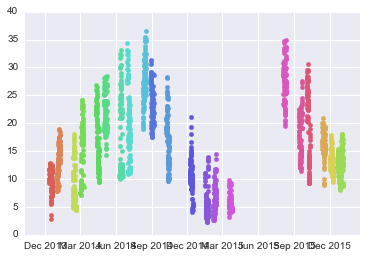

In [124]:
i= 0
for key,gp in gpfinal:
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',gpfinal.ngroups)[i])
    i+=1

In [117]:
gpfinal = add_group_column_to_data(df).groupby('group')

In [121]:
gpfinal.ngroups

21

In [115]:
len(df_test)+gptest.ngroups*48

2118

In [113]:
len(df)

2094

In [108]:
df

,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,set,group
2014-08-29 00:00:00,0,0.311341,28.408333,0,0,437.000000,1.810562,17.000000,1.546521,train,group0
2014-08-29 02:00:00,0,0.308141,28.454167,0,0,437.000000,1.324392,38.833333,1.114837,train,group0
2014-08-29 04:00:00,0,0.310422,27.954167,0,0,437.000000,1.659681,59.916667,1.274099,train,group0
2014-08-29 06:00:00,0,0.287957,28.875000,0,0,436.458333,2.313495,66.541667,1.898575,train,group0
2014-08-29 08:00:00,0,0.252454,31.275000,0,0,434.708333,2.150042,61.125000,1.911148,train,group0
2014-08-29 10:00:00,0,0.344305,30.650000,0,0,434.958333,1.596815,55.875000,1.227997,train,group0
2014-08-29 12:00:00,0,0.380290,31.175000,0,0,436.500000,1.982397,51.708333,1.479464,train,group0
2014-08-29 14:00:00,0,0.460115,29.100000,0,0,437.250000,1.856664,56.291667,1.341157,train,group0
2014-08-29 16:00:00,0,0.496907,27.412500,0,0,436.708333,1.437552,251.583333,1.093881,train,group0
2014-08-29 18:00:00,0,0.452185,25.895833,0,0,438.208333,2.426655,27.375000,2.045264,train,group0


In [96]:
add_group_column_to_data(df).group

2014-08-30 00:00:00    group0
2014-08-30 02:00:00    group0
2014-08-30 04:00:00    group0
2014-08-30 06:00:00    group0
2014-08-30 08:00:00    group0
2014-08-30 10:00:00    group0
2014-08-30 12:00:00    group0
2014-08-30 14:00:00    group0
2014-08-30 16:00:00    group0
2014-08-30 18:00:00    group0
2014-08-30 20:00:00    group0
2014-08-30 22:00:00    group0
2014-08-31 00:00:00    group0
2014-08-31 02:00:00    group0
2014-08-31 04:00:00    group0
2014-08-31 06:00:00    group0
2014-08-31 08:00:00    group0
2014-08-31 10:00:00    group0
2014-08-31 12:00:00    group0
2014-08-31 14:00:00    group0
2014-08-31 16:00:00    group0
2014-08-31 18:00:00    group0
2014-08-31 20:00:00    group0
2014-08-31 22:00:00    group0
2014-09-01 00:00:00    group0
2014-09-01 02:00:00    group0
2014-09-01 04:00:00    group0
2014-09-01 06:00:00    group0
2014-09-01 08:00:00    group0
2014-09-01 10:00:00    group0
                        ...  
2014-09-02 12:00:00    group0
2014-09-02 14:00:00    group0
2014-09-02

In [86]:
len(df)

72

In [39]:
gptest.get_group('group0').index[-1]

Timestamp('2013-12-17 22:00:00')

In [279]:
np.mean(y2,axis=1).shape

(114,)

In [297]:
np.add.at(y2)

((114, 12), (114, 12))

In [308]:
a = np.random.randn(3,3)

In [328]:
a.shape,mask.shape,b.shape

((2, 4), (2, 2), (2, 2))

In [326]:
a = np.array([[1, 2, 3, 4],[1,2,3,4]])
mask = np.array([[0, 1],[0,1]])
b = np.array([[1,2],[1,1]])
np.add.at(a, mask,b)

ValueError: array is not broadcastable to correct shape

In [323]:
a

array([2, 4, 3, 4])

In [315]:
mask = np.array([[1,2],[2,1],[3,1]])
mask.shape

(3, 2)

In [317]:
b = np.random.randn(*mask.shape)

In [319]:
np.add.at(a,mask,b)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [304]:
np.add.at(y2.T[114],mask.T[114],y.T[114])

IndexError: index 114 is out of bounds for axis 0 with size 12

In [302]:
np.add.at(y2,mask,y)

IndexError: index 114 is out of bounds for axis 0 with size 114

In [295]:
y2

array([[ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [287]:
np.add.at?

In [282]:
y2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [274]:
np.add.at(y,y2)

ValueError: second operand needed for ufunc

In [270]:
y2.shape,mask.shape,y.shape

((114, 125), (114, 12), (114, 12))

In [266]:
np.add?

In [261]:
y2

array([[ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.39687848, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [239]:
mask

array([[  0,   1,   2, ...,   9,  10,  11],
       [  1,   2,   3, ...,  10,  11,  12],
       [  2,   3,   4, ...,  11,  12,  13],
       ..., 
       [111, 112, 113, ..., 120, 121, 122],
       [112, 113, 114, ..., 121, 122, 123],
       [113, 114, 115, ..., 122, 123, 124]])

In [240]:
y2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [230]:
y2[100,mask[100,:]] = y[100]

In [241]:
for k in range(y2.shape[0]):
    y2[k,mask[k,:]] = y[k]

In [246]:
y2[100,:]

array([  0.00000000e+00,   0.00000000e+00,   2.39687848e+00,
         6.41722408e+00,   2.09030100e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [166]:
y2.shape

(114, 125)

In [175]:
y[0,:]

array([ 6.41722408,  0.02090301,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [177]:
y2[0,:]

array([  0.00000000e+00,   0.00000000e+00,   2.39687848e+00,
         6.41722408e+00,   2.09030100e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [154]:
y2.shape

(114, 125)

In [148]:
np.apply_along_axis(int,mask[0])

TypeError: apply_along_axis() takes at least 3 arguments (2 given)

In [144]:
X, y, mask = batch_iterator_train.stack_seqs.values()[0]

In [140]:
np.apply_along_axis(int,mask[0])

TypeError: apply_along_axis() takes at least 3 arguments (2 given)

In [146]:
mask[0][0,1]

1.0

In [139]:
y2[mask[0]]

IndexError: arrays used as indices must be of integer (or boolean) type

In [136]:
mask[0]

array([[   0.,    1.,    2., ...,    9.,   10.,   11.],
       [   1.,    2.,    3., ...,   10.,   11.,   12.],
       [   2.,    3.,    4., ...,   11.,   12.,   13.],
       ..., 
       [ 111.,  112.,  113., ...,  120.,  121.,  122.],
       [ 112.,  113.,  114., ...,  121.,  122.,  123.],
       [ 113.,  114.,  115., ...,  122.,  123.,  124.]])

In [133]:
np.add.at(y2,y,mask)

IndexError: arrays used as indices must be of integer (or boolean) type

In [101]:
batch_iterator_train.__iter__()

<generator object __iter__ at 0x13df1cd20>

In [97]:
for X,y,yb,yb in batch_iterator_train:
    print(y,mask)
    sys.exit()

ValueError: need more than 2 values to unpack

In [90]:
range(1,3)

[1, 2]

In [79]:
X,y,Xa,ya = batch_iterator_train.stack_seqs.values()[0]
np.allclose(X,Xa)

True

In [83]:
for X,y in batch_iterator_train:
    print(X.shape,y.shape)
    sys.exit()

(5, 12, 9) (5, 12)


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


# RNN MODEL 

In [309]:
nfeats, batch_iterator_train, batch_iterator_val, batch_iterator_pred = load_data()

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


In [302]:
b= BaseBatchIterator(feats=['humidity'], label='yield', batch_size=25, size_seq=14, stride=1, verbose=False)

In [303]:
f = b(train)

In [304]:
g = b(val)

In [305]:
f.df

,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,group,set,yield
2014-12-13 00:00:00,0.000000,0.422900,9.304167,0.000000,NaN,442.875000,1.903017,104.375000,1.483850,group20,train,0.000000
2014-12-13 02:00:00,0.000000,0.442019,8.425000,0.000000,NaN,442.875000,2.753925,92.958333,2.397633,group20,train,0.000000
2014-12-13 04:00:00,0.000000,0.419805,8.558333,0.000000,NaN,442.083333,4.091067,112.041667,3.596450,group20,train,0.000000
2014-12-13 06:00:00,0.000000,0.429900,7.962500,0.000000,NaN,442.041667,3.935975,127.583333,3.504233,group20,train,0.000000
2014-12-13 08:00:00,0.000000,0.437961,8.675000,0.000000,NaN,441.166667,3.030575,116.583333,2.531767,group20,train,0.000000
2014-12-13 10:00:00,0.000000,0.427143,9.937500,0.000000,NaN,441.208333,2.682667,103.208333,2.225775,group20,train,0.000000
2014-12-13 12:00:00,0.000000,0.404170,10.862500,0.000000,NaN,441.000000,2.401825,92.916667,1.626367,group20,train,0.000000
2014-12-13 14:00:00,0.000000,0.402404,10.579167,0.000000,NaN,441.000000,2.200625,123.208333,1.659900,group20,train,0.000000
2014-12-13 16:00:00,0.000000,0.419792,10.191667,0.000000,NaN,441.541667,1.383250,227.875000,0.876058,group20,train,0.000000
2014-12-13 18:00:00,0.016667,0.532913,8.850000,0.458333,NaN,445.250000,1.311992,227.166667,0.901208,group20,train,0.000000


In [306]:
g.df

,percip_mm,humidity,temp,leafwet450_min,leafwet460_min,leafwet_lwscnt,gusts_ms,wind_dir,wind_ms,group,set,yield
2014-12-13 00:00:00,0.000000,0.422900,9.304167,0.000000,NaN,442.875000,1.903017,104.375000,1.483850,group20,train,0.000000
2014-12-13 02:00:00,0.000000,0.442019,8.425000,0.000000,NaN,442.875000,2.753925,92.958333,2.397633,group20,train,0.000000
2014-12-13 04:00:00,0.000000,0.419805,8.558333,0.000000,NaN,442.083333,4.091067,112.041667,3.596450,group20,train,0.000000
2014-12-13 06:00:00,0.000000,0.429900,7.962500,0.000000,NaN,442.041667,3.935975,127.583333,3.504233,group20,train,0.000000
2014-12-13 08:00:00,0.000000,0.437961,8.675000,0.000000,NaN,441.166667,3.030575,116.583333,2.531767,group20,train,0.000000
2014-12-13 10:00:00,0.000000,0.427143,9.937500,0.000000,NaN,441.208333,2.682667,103.208333,2.225775,group20,train,0.000000
2014-12-13 12:00:00,0.000000,0.404170,10.862500,0.000000,NaN,441.000000,2.401825,92.916667,1.626367,group20,train,0.000000
2014-12-13 14:00:00,0.000000,0.402404,10.579167,0.000000,NaN,441.000000,2.200625,123.208333,1.659900,group20,train,0.000000
2014-12-13 16:00:00,0.000000,0.419792,10.191667,0.000000,NaN,441.541667,1.383250,227.875000,0.876058,group20,train,0.000000
2014-12-13 18:00:00,0.016667,0.532913,8.850000,0.458333,NaN,445.250000,1.311992,227.166667,0.901208,group20,train,0.000000


In [296]:
g.stride = 2

In [297]:
f.stride

2

In [277]:
batch_iterator_train.predict

True

In [131]:
import theano.tensor as TT 
import lasagne
## Parameters
# batch size : N
# Seq length : T
# Num features : D
# Size hidden layer

D = 2
H = 100
GRAD_CLIP = 10
# First, we build the network, starting with an input layer
# Recurrent layers expect input of shape
# (batch size, SEQ_LENGTH, num_features)

l_in = lasagne.layers.InputLayer(name='in', 
                                 shape=(None, None, D))
batchsize, seqlen, _ = l_in.input_var.shape

# We now build the LSTM layer which takes l_in as the input layer
# We clip the gradients at GRAD_CLIP to prevent the problem of exploding
# gradients.

l_lstm = lasagne.layers.LSTMLayer(l_in, 
                                     H,
                                     name='lstm',
                                     grad_clipping=GRAD_CLIP,
                                     nonlinearity=lasagne.nonlinearities.tanh)
l_shp = lasagne.layers.ReshapeLayer(l_lstm, (-1, H))
l_dense = lasagne.layers.DenseLayer(l_shp, 
                                    num_units=1,
                                   name = 'dense',
                                   nonlinearity = lasagne.nonlinearities.identity)
l_out = lasagne.layers.ReshapeLayer(l_dense, (batchsize, seqlen))

In [132]:
from utils.nolearn_net import NeuralNet
net = NeuralNet(
    layers=l_out,
    regression=True,
    objective_loss_function=lasagne.objectives.squared_error,
    objective_l2=1e-3,
    update=lasagne.updates.adam,
    update_learning_rate=1e-4,
    train_split = False,
    batch_iterator_train=batch_iterator_train,
    batch_iterator_test=batch_iterator_val,
    verbose=15,
    max_epochs=10000,
)
net.initialize()

net.fit(epochs = 10)

# Neural Network with 41601 learnable parameters

## Layer information

  #  name    size
---  ------  --------
  0  in      Nonex2
     lstm    Nonex100
             100
     dense   1
             None

85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.46197       0.42909      1.07663  2.25s
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
      2       0.41945       0.41083      1.02098  1.94s
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
      3       0.40375       0.39599      1.01960  1.88s
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
163
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
     

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<utils.iterator.BaseBatchIterator object at 0x119667f10>,
     batch_iterator_train=<utils.iterator.BaseBatchIterator object at 0x119667f10>,
     custom_scores=None,
     layers=[<lasagne.layers.shape.ReshapeLayer object at 0x124b422d0>],
     loss=None, max_epochs=10000, more_params={},
     objective=<function objective at 0x11641acf8>, objective_l2=0.001,
     objective_loss_function=<function squared_error at 0x11621e1b8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x124aeffc8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x124aefb90>],
     regression=True, train_split=False,
     update=<function adam at 0x116224410>, update_learning_rate=0.0001,
     use_label_encoder=False, verbose=15,
     y_tensor_type=TensorType(float64, matrix))

In [134]:
y_pred = []
for i,(Xb,_,mask) in enumerate(batch_iterator_pred.stack_seqs.values()):
    y_pred = net.predict(Xb)
    y2 = np.zeros(mask[1])
    mask = mask[0].astype('int')
    for k in range(y2.shape[0]):
        y2[k,mask[k,:]] = y_pred[0][k]

In [189]:
df_pred = batch_iterator_pred.df

In [275]:
final_pred = {}
df_pred = batch_iterator_pred.df
for gp,X, p in batch_iterator_pred:
    mask = p[0].astype('int')
    ypred = net.predict(X)
    ypred_reshape = np.zeros(p[1])
    for k in range(ypred_reshape.shape[0]):
        ypred_reshape[k,mask[k,:]] = ypred[k,:]
    final_pred.update(dict(zip(df_pred[df_pred.group==gp].index,np.mean(ypred_reshape,axis=0))))
final_pred = pd.DataFrame(final_pred.values(),index= final_pred.keys(),columns = ['yield'])

In [273]:
any(final_pred == final_pred2)

True

In [269]:
map(lambda x:p[-1][x], range(p[1][1]))

[Timestamp('2015-09-13 00:00:00'),
 Timestamp('2015-09-13 02:00:00'),
 Timestamp('2015-09-13 04:00:00'),
 Timestamp('2015-09-13 06:00:00'),
 Timestamp('2015-09-13 08:00:00'),
 Timestamp('2015-09-13 10:00:00'),
 Timestamp('2015-09-13 12:00:00'),
 Timestamp('2015-09-13 14:00:00'),
 Timestamp('2015-09-13 16:00:00'),
 Timestamp('2015-09-13 18:00:00'),
 Timestamp('2015-09-13 20:00:00'),
 Timestamp('2015-09-13 22:00:00'),
 Timestamp('2015-09-14 00:00:00'),
 Timestamp('2015-09-14 02:00:00'),
 Timestamp('2015-09-14 04:00:00'),
 Timestamp('2015-09-14 06:00:00'),
 Timestamp('2015-09-14 08:00:00'),
 Timestamp('2015-09-14 10:00:00'),
 Timestamp('2015-09-14 12:00:00'),
 Timestamp('2015-09-14 14:00:00'),
 Timestamp('2015-09-14 16:00:00'),
 Timestamp('2015-09-14 18:00:00'),
 Timestamp('2015-09-14 20:00:00'),
 Timestamp('2015-09-14 22:00:00'),
 Timestamp('2015-09-15 00:00:00'),
 Timestamp('2015-09-15 02:00:00'),
 Timestamp('2015-09-15 04:00:00'),
 Timestamp('2015-09-15 06:00:00'),
 Timestamp('2015-09-

In [256]:
p[-1][0]

(Timestamp('2015-09-13 00:00:00'), 0)

In [251]:
final_pred

,yield
2014-08-09 14:00:00,-0.004336
2013-12-19 22:00:00,-0.000207
2014-01-01 22:00:00,-0.000542
2014-06-14 14:00:00,-0.006859
2014-04-12 18:00:00,0.001504
2015-03-18 18:00:00,-0.001848
2014-10-14 10:00:00,0.000611
2015-09-16 06:00:00,0.001740
2015-10-04 22:00:00,-0.006061
2014-12-08 08:00:00,0.001139


In [249]:
df_pred['yield'].sum()

0

In [243]:
df_pred[df_pred.group==gp].loc[:,'yield'] = np.mean(ypred_reshape,axis=0)

In [234]:
ypred_reshape

array([[-0.05583861, -0.01464067,  0.00579385, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.05427465, -0.01866394, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.05902631, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ..., -0.0077314 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.007903  ,
         0.0073404 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00812444,
         0.00720186,  0.00521124]])

In [233]:
final_pred

,yield
2014-08-09 14:00:00,-0.004336
2013-12-19 22:00:00,-0.000207
2014-01-01 22:00:00,-0.000542
2014-06-14 14:00:00,-0.006859
2014-04-12 18:00:00,0.001504
2015-03-18 18:00:00,-0.001848
2014-10-14 10:00:00,0.000611
2015-09-16 06:00:00,0.001740
2015-10-04 22:00:00,-0.006061
2014-12-08 08:00:00,0.001139


In [230]:
a = pd.DataFrame(final_pred.values(),index= final_pred.keys(),columns = ['yield'])

In [231]:
a

,yield
2014-08-09 14:00:00,-0.004336
2013-12-19 22:00:00,-0.000207
2014-01-01 22:00:00,-0.000542
2014-06-14 14:00:00,-0.006859
2014-04-12 18:00:00,0.001504
2015-03-18 18:00:00,-0.001848
2014-10-14 10:00:00,0.000611
2015-09-16 06:00:00,0.001740
2015-10-04 22:00:00,-0.006061
2014-12-08 08:00:00,0.001139


In [226]:
a['yield']

KeyError: 'yield'

In [218]:
df_pred[df_pred.group==gp].loc[:,'yield']

2015-09-13 00:00:00    0
2015-09-13 02:00:00    0
2015-09-13 04:00:00    0
2015-09-13 06:00:00    0
2015-09-13 08:00:00    0
2015-09-13 10:00:00    0
2015-09-13 12:00:00    0
2015-09-13 14:00:00    0
2015-09-13 16:00:00    0
2015-09-13 18:00:00    0
2015-09-13 20:00:00    0
2015-09-13 22:00:00    0
2015-09-14 00:00:00    0
2015-09-14 02:00:00    0
2015-09-14 04:00:00    0
2015-09-14 06:00:00    0
2015-09-14 08:00:00    0
2015-09-14 10:00:00    0
2015-09-14 12:00:00    0
2015-09-14 14:00:00    0
2015-09-14 16:00:00    0
2015-09-14 18:00:00    0
2015-09-14 20:00:00    0
2015-09-14 22:00:00    0
2015-09-15 00:00:00    0
2015-09-15 02:00:00    0
2015-09-15 04:00:00    0
2015-09-15 06:00:00    0
2015-09-15 08:00:00    0
2015-09-15 10:00:00    0
                      ..
2015-09-18 12:00:00    0
2015-09-18 14:00:00    0
2015-09-18 16:00:00    0
2015-09-18 18:00:00    0
2015-09-18 20:00:00    0
2015-09-18 22:00:00    0
2015-09-19 00:00:00    0
2015-09-19 02:00:00    0
2015-09-19 04:00:00    0


In [215]:
df.loc['yield']

KeyError: 'the label [yield] is not in the [index]'

In [194]:
gp, ypred_reshape.shape

('group8', (85, 96))

In [201]:
 np.mean(ypred_reshape,axis=0).shape,df_pred[df_pred.group==gp].shape

((96,), (96, 12))

In [203]:
df_pred[df_pred.group==gp]['yield'] = np.mean(ypred_reshape,axis=0)

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [205]:
zip(df_pred[df_pred.group==gp].index,np.mean(ypred_reshape,axis=0))

[(Timestamp('2015-09-13 00:00:00'), -0.00065692483221754707),
 (Timestamp('2015-09-13 02:00:00'), -0.0008107684976898788),
 (Timestamp('2015-09-13 04:00:00'), -0.00084583997505650855),
 (Timestamp('2015-09-13 06:00:00'), -0.0009779411018203375),
 (Timestamp('2015-09-13 08:00:00'), -0.0016921944029010751),
 (Timestamp('2015-09-13 10:00:00'), -0.0017171425163993313),
 (Timestamp('2015-09-13 12:00:00'), -0.0019097426777437583),
 (Timestamp('2015-09-13 14:00:00'), -0.0019483262158120098),
 (Timestamp('2015-09-13 16:00:00'), -0.00064709978701344188),
 (Timestamp('2015-09-13 18:00:00'), 0.0012811627008647338),
 (Timestamp('2015-09-13 20:00:00'), 0.0038096261222912995),
 (Timestamp('2015-09-13 22:00:00'), 0.0059863730993220832),
 (Timestamp('2015-09-14 00:00:00'), 0.0048880351663644758),
 (Timestamp('2015-09-14 02:00:00'), 0.0031562607423068724),
 (Timestamp('2015-09-14 04:00:00'), 0.0025458315847461544),
 (Timestamp('2015-09-14 06:00:00'), 0.0034689379934271479),
 (Timestamp('2015-09-14 08:0

In [183]:
y_pred[k,:]

TypeError: list indices must be integers, not tuple

In [176]:
ypred.shape

(85, 12)

In [177]:
ypred_reshape.shape,mask.shape,ypred.shape

((85, 96), (85, 12), (85, 12))

(21,)

In [154]:
X, y, mask = batch_iterator_pred.stack_seqs.values()[0]
y2 = np.zeros(mask[1])
mask = mask[0].astype('int')
for k in range(y2.shape[0]):
    y2[k,mask[k,:]] = y_pred[0][k]

In [153]:
y.shape,y_pred[0].shape

((85, 12), (85, 12))

In [146]:
X, y, mask = batch_iterator_pred.stack_seqs.values()[0]
y2 = np.zeros(mask[1])
mask = mask[0].astype('int')
for k in range(y2.shape[0]):
    y2[k,mask[k,:]] = y_pred[k]

ValueError: shape mismatch: value array of shape (85,12) could not be broadcast to indexing result of shape (12,)

In [138]:
y2

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [136]:
y_pred[0].shape

(85, 12)

In [23]:
net._get_params_for('objective')

{'l2': 0.0, 'loss_function': <function lasagne.objectives.squared_error>}

In [24]:
np.mean(lasagne.objectives.squared_error(net.apply_batch_func(net.predict_iter_, Xb),yb))

1.0449939224204698

In [73]:
from sklearn.metrics import mean_squared_error

In [36]:
net.get_score_whole_set('test')

9.1914617758542541

In [14]:
from sklearn.metrics import mean_squared_error

In [16]:
pred = []
target = []
for Xb,yb in batch_iterator_train:
    pred.append(mean_squared_error(net.apply_batch_func(net.predict_iter_, Xb),yb))
pred = np.array(pred)

In [18]:
np.sqrt(np.mean(pred))

3.7476773361585503

In [35]:
mean_squared_error(net.apply_batch_func(net.predict_iter_, Xb),yb)

0.14033050987307397

In [69]:
lasagne.objectives.aggregate?

In [61]:
net.apply_batch_func(net.eval_iter_, Xb, yb)

[array(0.45936805094318883), array(0.45936805094318883)]

In [29]:
valid_losses = []
valid_accuracies= []
for Xb, yb in net.batch_iterator_test:
    batch_valid_loss2, accuracy2 = net.get_score(Xb, yb),net.get_score(Xb, yb)
    batch_valid_loss, accuracy = net.apply_batch_func(net.eval_iter_, Xb, yb)
    valid_losses.append([batch_valid_loss,batch_valid_loss2])
    valid_accuracies.append([accuracy,accuracy2])

In [31]:
np.mean(valid_losses,axis=0),np.sum(valid_accuracies,axis= 0)

(array([ 10.45994096,   2.15503139]), array([ 2133.82795635,   439.62640414]))

In [21]:
for i, (Xb,yb) in enumerate(batch_iterator_val):
    print(net.apply_batch_func(net.eval_iter_, Xb, yb))
    if i >2:
        sys.exit()

[array(0.11667825419087607), array(0.11667825419087607)]
[array(0.11904364708938715), array(0.11904364708938715)]
[array(0.09242973349573437), array(0.09242973349573437)]
[array(0.08429630374667692), array(0.08429630374667692)]


SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
batch_valid_loss

In [19]:
net.get_score_whole_set('train')

1.468002517991347

In [114]:
scores_predict = []
scores_true = []
for Xb,yb in batch_iterator_val:
    scores_predict.append(net.predict(Xb))
    scores_true.append(yb)

In [ ]:
sco

In [80]:
import os

In [83]:
os.path.expanduser

<function posixpath.expanduser>

In [84]:
root = '/Users/thorey/Documents/project/competition/fognet/models/lstm/model_0'

In [86]:
import json

In [89]:
with open(os.path.join(root,'conf_model.json')) as f:
    conf = json.load(f)

In [34]:
data = Data()

In [41]:
from utils.data_utils import *

In [42]:
        inputer = MyImputer(strategy='mean')
        inputer.fit(train[train.columns[:-2]])

MyImputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [46]:
data.process_data_benchmark()

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


(<utils.iterator.BaseBatchIterator at 0x12a78dcd0>,
 <utils.iterator.BaseBatchIterator at 0x12a78dcd0>)

In [57]:
import importlib

In [71]:
architecture = importlib.import_module('model_defs.lstm')
builder = getattr(architecture,'build_simple_lstm')
builder(D=2, H=100, GRAD_CLIP=10)

In [79]:
len(batch_iterator_train.feats)

9

In [74]:
for Xb,yb in batch_iterator_val:
    print(Xb.shape,Xb)
    sys.exit()

(5, 24, 9) [[[   0.            0.31970725   16.09583333 ...,    1.89463333  123.875
      1.75630833]
  [   0.            0.33959684   15.39166667 ...,    2.351525    127.66666667
      2.1126    ]
  [   0.            0.3518744    14.75       ...,    2.28026667  133.25
      2.03715   ]
  ..., 
  [   0.            0.21601246   16.625      ...,    3.458125     86.
      2.88386667]
  [   0.            0.22197128   16.025      ...,    3.99046667
     82.29166667    3.18566667]
  [   0.            0.24527263   15.36666667 ...,    3.6216       79.29166667
      3.09345   ]]

 [[   0.            0.33959684   15.39166667 ...,    2.351525    127.66666667
      2.1126    ]
  [   0.            0.3518744    14.75       ...,    2.28026667  133.25
      2.03715   ]
  [   0.            0.34813538   14.95833333 ...,    2.14613333
    141.04166667    1.92816667]
  ..., 
  [   0.            0.22197128   16.025      ...,    3.99046667
     82.29166667    3.18566667]
  [   0.            0.24527263   15.

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [56]:
    getattr(lasagne.objectives,'squared_error')

<function lasagne.objectives.squared_error>

In [53]:
getattr(data,'process_data_benchmark')()

Le train is composed by 19 group and 3354 observation
Le val is composed by 7 group and 1083 observation
Le test is composed by 8 group and 1361 observation


(<utils.iterator.BaseBatchIterator at 0x12a78d0d0>,
 <utils.iterator.BaseBatchIterator at 0x12a78d0d0>)

In [10]:
net.batch_iterator_train = batch_iterator_train
net.batch_iterator_test = batch_iterator_val
net.initialize()

In [26]:
net.get_score_whole_set('test')

1.3686325759270976

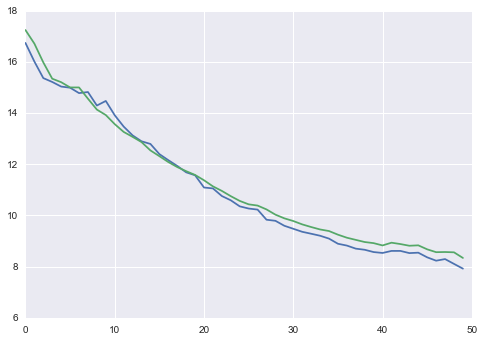

In [16]:
plt.plot([f['valid_loss'] for f in net.train_history_])
plt.plot([f['train_loss'] for f in net.train_history_])

In [2]:
import numpy as np
np.sqrt(3.8)

1.9493588689617927

In [20]:
net.predict()

array([[ 0.91455285,  0.05339446, -0.03429878, ..., -0.08039147,
        -0.07265196, -0.03766962],
       [ 1.13275435,  0.13893034, -0.03259964, ..., -0.07209404,
        -0.03736325,  0.08674202],
       [ 1.31006544,  0.15349411, -0.00247873, ..., -0.03683145,
         0.0877185 ,  0.16245854],
       ..., 
       [ 0.02781247, -0.34743854, -0.27740044, ...,  0.13347038,
        -0.22354135,  0.23109068],
       [ 0.5709322 , -0.23337237, -0.06095584, ..., -0.22228495,
         0.2327262 ,  0.04284291],
       [ 0.78388102, -0.03150363, -0.03977821, ...,  0.234507  ,
         0.04353782, -0.18843932]])

In [ ]:
for Xb,yb in 